In [13]:
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics"

import numpy as np
import pandas as pd

In [26]:
fst_data = pd.read_csv(f"{location}/5.Papilio_polytes/1.FST_peaks_from_chris/NE.PI.1kb.gt10snps.fst.bed", sep = "\t",low_memory=False, header = None)
fst_data


,0,1,2,3,4,5,6
0,NE India,Peninsular India,NC_024742.1,1001,2000,0.002736,18
1,NE India,Peninsular India,NC_024742.1,2001,3000,-0.036744,40
2,NE India,Peninsular India,NC_024742.1,4001,5000,0.053237,21
3,NE India,Peninsular India,NW_013524711.1,1,1000,-0.034021,39
4,NE India,Peninsular India,NW_013524711.1,1001,2000,-0.007071,77
...,...,...,...,...,...,...,...
209012,NE India,Peninsular India,NW_013528583.1,129001,130000,-0.081495,25
209013,NE India,Peninsular India,NW_013528583.1,130001,131000,-0.076470,12
209014,NE India,Peninsular India,NW_013528583.1,132001,133000,-0.069021,60
209015,NE India,Peninsular India,NW_013528583.1,133001,134000,-0.085390,55


In [27]:
fst_column = 5
chr_column = 2
start_col = 3
stop_col = 4

fst_values = fst_data[fst_column]
fst_values

0         0.002736
1        -0.036744
2         0.053237
3        -0.034021
4        -0.007071
            ...   
209012   -0.081495
209013   -0.076470
209014   -0.069021
209015   -0.085390
209016   -0.093235
Name: 5, Length: 209017, dtype: float64

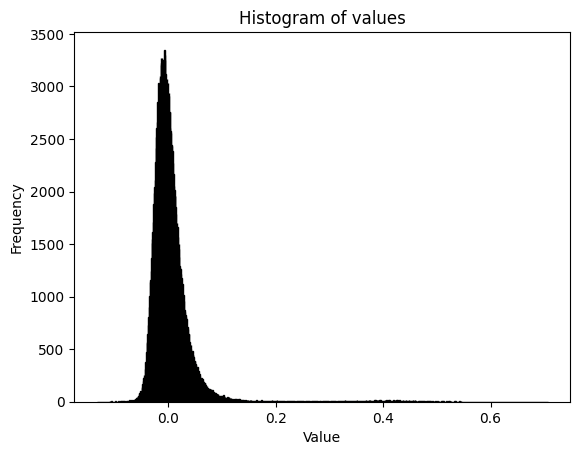

In [28]:
import matplotlib.pyplot as plt


plt.hist(fst_data[fst_column], bins = 1000, edgecolor='black')
plt.title('Histogram of values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [29]:
import statistics
statistics.quantiles(fst_data[fst_column])

[-0.0171834658808456, -0.0034254428890175, 0.014150120910207401]

In [42]:
percentile_99 = fst_data[fst_column].quantile(0.95)
print(percentile_99)
# percentile_99 = 0.3
filtered_df = fst_data[fst_data[fst_column] > percentile_99]

print(filtered_df)

0.058079903876504975
               0                 1               2        3        4  \
102     NE India  Peninsular India  NW_013524711.1   108001   109000   
112     NE India  Peninsular India  NW_013524711.1   120001   121000   
195     NE India  Peninsular India  NW_013524711.1   216001   217000   
290     NE India  Peninsular India  NW_013524711.1   318001   319000   
325     NE India  Peninsular India  NW_013524711.1   354001   355000   
...          ...               ...             ...      ...      ...   
208817  NE India  Peninsular India  NW_013528582.1  2168001  2169000   
208867  NE India  Peninsular India  NW_013528582.1  2218001  2219000   
208885  NE India  Peninsular India  NW_013528582.1  2239001  2240000   
208901  NE India  Peninsular India  NW_013528582.1  2255001  2256000   
208955  NE India  Peninsular India  NW_013528583.1     1001     2000   

               5    6  
102     0.080704   69  
112     0.077160  103  
195     0.067369   60  
290     0.173304  

In [43]:
filtered_df.rename(columns={chr_column: 'chrom'}, inplace=True)
filtered_df.rename(columns={start_col: 'start'}, inplace=True)
filtered_df.rename(columns={stop_col: 'end'}, inplace=True)
filtered_df.rename(columns={fst_column: 'mean_fst'}, inplace=True)
filtered_df.drop(columns=0, inplace=True)
filtered_df.drop(columns=1, inplace=True)
filtered_df.drop(columns=6, inplace=True)

filtered_df

filtered_df.to_csv(f"{location}/5.Papilio_polytes/1.FST_peaks_from_chris/two_pool_5%_{round(percentile_99,3)}_5kb_unmerged.fst", index=False)

/tmp/ipykernel_5875/17836722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={chr_column: 'chrom'}, inplace=True)
/tmp/ipykernel_5875/17836722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={start_col: 'start'}, inplace=True)
/tmp/ipykernel_5875/17836722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={stop_col: 'end'}, inplace=True)
/tmp/ipyk

In [16]:
df = filtered_df.sort_values(by=[chr_column, start_col]).reset_index(drop=True)

# Grouping logic
groups = []
current_group = [0]

for i in range(1, len(df)):
    prev = df.loc[current_group[-1]]
    # print(prev)
    curr = df.loc[i]
    # print(curr)
    # assert False
    # Check if same chromosome and start is within 5000 of previous end
    if curr[chr_column] == prev[chr_column] and (curr[start_col] - prev[stop_col]) <= 5000:
        current_group.append(i)
    else:
        groups.append(current_group)
        current_group = [i]

# Add last group
groups.append(current_group)
# print(groups)
# assert False
# Build merged DataFrame
merged_rows = []
for group in groups:
    if len(group) > 0:
        merged = {
            'chrom': df.loc[group[0], chr_column],
            'start': df.loc[group, start_col].min(),
            'end': df.loc[group, stop_col].max(),
            'mean_fst': round(df.loc[group, fst_column].mean(),3)
        }
        merged_rows.append(merged)

merged_df = pd.DataFrame(merged_rows)
print(merged_df)

            chrom     start       end  mean_fst
0     NC_053180.1    451001    452000     0.080
1     NC_053180.1    457001    458000     0.128
2     NC_053180.1    478001    479000     0.086
3     NC_053180.1    691001    692000     0.173
4     NC_053180.1    792001    793000     0.099
...           ...       ...       ...       ...
8890  NC_053208.1  26680001  26681000     0.141
8891  NC_053208.1  26697001  26698000     0.085
8892  NC_053208.1  26934001  26935000     0.101
8893  NC_053208.1  26944001  26945000     0.077
8894  NC_053208.1  27155001  27156000     0.106

[8895 rows x 4 columns]


In [17]:
merged_df.to_csv(f"{location}/3.Pararge_aegeria/1.FST_peaks_from_chris/two_pool_5%_{round(percentile_99,3)}_5kb_merged.fst", index=False)

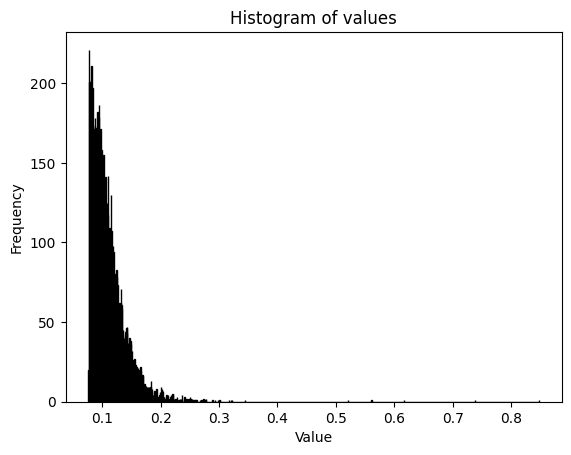

In [18]:
plt.hist(merged_df["mean_fst"], bins = 1000, edgecolor='black')
plt.title('Histogram of values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [37]:
gene_anno_dict = {}
with open("/mnt/c/Users/sauba/Downloads/MM_6p5hm4fm.emapper.annotations.tsv", 'r') as eggnog_file:
	for lines in eggnog_file.readlines():
		if not(lines.startswith("#")):
			lines_split = lines.split("\t")
			gene_anno_dict[lines_split[0]] = lines_split[8]
# print(gene_anno_dict)
output = ''
with open("/mnt/c/Users/sauba/Downloads/RERconverge_output.csv", 'r') as coor_file:
    lines = coor_file.readlines()
output = lines[0].strip() + ",Annotation\n"
for line in lines[1:]:
    lines_split = line.strip().split(",")
    # print(lines_split[0])
    try:
        gene_name = gene_anno_dict[lines_split[0][1:-1]]
        if  gene_name == "-":
            gene_name = lines_split[0][1:-1]
        output += ",".join(lines_split) + ","+ gene_name + "\n"
    # print(gene_anno_dict[lines_split[0][1:-1]])
    # assert False
    except:
        gene_name = lines_split[0][1:-1]
        output += ",".join(lines_split) + ","+ gene_name + "\n"
        # pass
print(output)
with open("/mnt/c/Users/sauba/Downloads/RERconverge_output_annotated.csv", 'w') as out_file:
    out_file.write(output)
    # assert False
    

"","Rho","N","P","p.adj",Annotation
"110247at7088",-0.239246854188424,34,0.097109722259036,0.781762715717847,110247at7088
"110651at7088",-0.201850365754771,35,0.155218489684684,0.825336430094103,110651at7088
"111736at7088",-0.162735240868995,30,0.291032533885935,0.898019280542564,111736at7088
"113487at7088",-0.0207425191536693,35,0.883874537256707,0.986939012107493,USP22
"113851at7088",0.273553602891834,26,0.100206659424036,0.781762715717847,GNB2L1
"114661at7088",NA,NA,NA,NA,UBE2V2
"115148at7088",-0.333834806420685,32,0.0249812288603192,0.771625506380056,SLC25A30
"116482at7088",NA,NA,NA,NA,UBE2M
"117446at7088",-0.195180014589707,28,0.222269969494647,0.862167162842307,POLR2H
"121568at7088",0.251103427841963,27,0.123588800306243,0.78929926747301,AMMECR1L
"122426at7088",-0.0960030721474639,31,0.526168477756143,0.94250079888418,122426at7088
"123616at7088",-0.0475248456521757,23,0.789268026134281,0.97843227099408,RFK
"124187at7088",0.138013111868471,28,0.388118805075828,0.928004545016726,GI

In [50]:
output = "Parent\tGO_term"
with open("/mnt/c/Users/sauba/Downloads/MM_6p5hm4fm.emapper.annotations.tsv", 'r') as eggnog_file:
    for lines in eggnog_file.readlines():
        if not(lines.startswith("#")):
            lines_split = lines.split("\t")
            output += f"\n{lines_split[0]}\t{lines_split[9]}"
            # print (output)
            # assert False
with open("/mnt/c/Users/sauba/Downloads/GO_header.tsv", 'w') as out_file:
    out_file.write(output)
    

Parent	GO_term
679at7088	GO:0005575,GO:0005622,GO:0005623,GO:0005737,GO:0044424,GO:0044464


AssertionError: 